In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_excel('cornell-median-grades.xlsx')

In [3]:
df.head()

,Unnamed: 0,Professor,Median Grade,Median Grade.1,# of Students,Notes
0,ENGL 1134 (FWS: True Stories),Various (FWS),A+,SP21,64.0,2-3 graded essays & interesting assigned readings
1,AAS 2130,Chang,A,FA21,52.0,"crosslisted with AMST 2640, HIST 2640"
2,AAS 2130,Moghimi,A,FA21,NaN,NaN
3,281,van Es,B+,FA17,239.0,NaN
4,AEM 1200,Sauer,A-,SP22,326.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      949 non-null    object 
 1   Professor       950 non-null    object 
 2   Median Grade    949 non-null    object 
 3   Median Grade.1  949 non-null    object 
 4   # of Students   890 non-null    float64
 5   Notes           184 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.8+ KB


In [5]:
df.isna().sum()

Unnamed: 0          3
Professor           2
Median Grade        3
Median Grade.1      3
# of Students      62
Notes             768
dtype: int64

In [6]:
df.rename(columns={'Unnamed: 0': 'Class', 'Median Grade.1': 'Semester'}, inplace=True)
df.head()

,Class,Professor,Median Grade,Semester,# of Students,Notes
0,ENGL 1134 (FWS: True Stories),Various (FWS),A+,SP21,64.0,2-3 graded essays & interesting assigned readings
1,AAS 2130,Chang,A,FA21,52.0,"crosslisted with AMST 2640, HIST 2640"
2,AAS 2130,Moghimi,A,FA21,NaN,NaN
3,281,van Es,B+,FA17,239.0,NaN
4,AEM 1200,Sauer,A-,SP22,326.0,NaN


In [7]:
df[df['Class'].isna()].index

Int64Index([680, 847, 916], dtype='int64')

In [8]:
df.drop(labels=df[df['Class'].isna()].index, inplace=True)

In [9]:
df.isna().sum()

Class              0
Professor          2
Median Grade       3
Semester           3
# of Students     62
Notes            765
dtype: int64

In [10]:
cs_classes = df[df['Class'].str.contains('CS', na=False)]

In [11]:
cs_classes.head()

,Class,Professor,Median Grade,Semester,# of Students,Notes
235,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...
236,CS 1110,Lee/Bracy,B,FA20,460.0,NaN
237,CS 1110,White,B+,FA22,743.0,NaN
238,CS 1112,Fan,B,SP22,157.0,NaN
239,CS 1112,Fan,B,FA21,NaN,NaN


In [12]:
cs_classes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 235 to 322
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Class          87 non-null     object 
 1   Professor      87 non-null     object 
 2   Median Grade   86 non-null     object 
 3   Semester       87 non-null     object 
 4   # of Students  84 non-null     float64
 5   Notes          18 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [13]:
cs_classes.isna().sum()

Class             0
Professor         0
Median Grade      1
Semester          0
# of Students     3
Notes            69
dtype: int64

In [14]:
cs_classes

,Class,Professor,Median Grade,Semester,# of Students,Notes
235,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...
236,CS 1110,Lee/Bracy,B,FA20,460.0,NaN
237,CS 1110,White,B+,FA22,743.0,NaN
238,CS 1112,Fan,B,SP22,157.0,NaN
239,CS 1112,Fan,B,FA21,NaN,NaN
...,...,...,...,...,...,...
318,CS 4830,Noah,A,SP22,55.0,NaN
319,CS 4830,Stephens-Davidowitz,A,SP21,37.0,NaN
320,CS 4850,Kleinberg,B+,SP22,50.0,NaN
321,CS 4860,Bob Constable,B+,FA20,22.0,NaN


In [15]:
cs_classes.index = np.arange(0, len(cs_classes))
cs_classes.head()

,Class,Professor,Median Grade,Semester,# of Students,Notes
0,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...
1,CS 1110,Lee/Bracy,B,FA20,460.0,NaN
2,CS 1110,White,B+,FA22,743.0,NaN
3,CS 1112,Fan,B,SP22,157.0,NaN
4,CS 1112,Fan,B,FA21,NaN,NaN


In [39]:
student_number = np.array(cs_classes['# of Students'])
bar_x = ['50', '100', '150', '200', '250', '300', '350', '400', '450', '>450']
bar_y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in student_number:
  if (i < 50):
    bar_y[0] += 1
  elif (i < 100):
    bar_y[1] +=1
  elif (i < 150):
    bar_y[2] += 1
  elif (i < 200):
    bar_y[3] += 1
  elif (i < 250):
    bar_y[4] += 1
  elif (i < 300):
    bar_y[5] += 1
  elif (i < 350):
    bar_y[6] += 1
  elif (i < 400):
    bar_y[7] += 1
  elif (i < 450):
    bar_y[8] += 1
  else:
    bar_y[9] += 1
    
bar_y

[17, 13, 10, 9, 7, 8, 5, 3, 5, 10]

In [60]:
sb.set_style('whitegrid')

In [53]:
import matplotlib as mpl

In [58]:
mpl.rcParams['figure.dpi'] = 300

In [108]:
cs_classes['# of Students'].median()

163.5

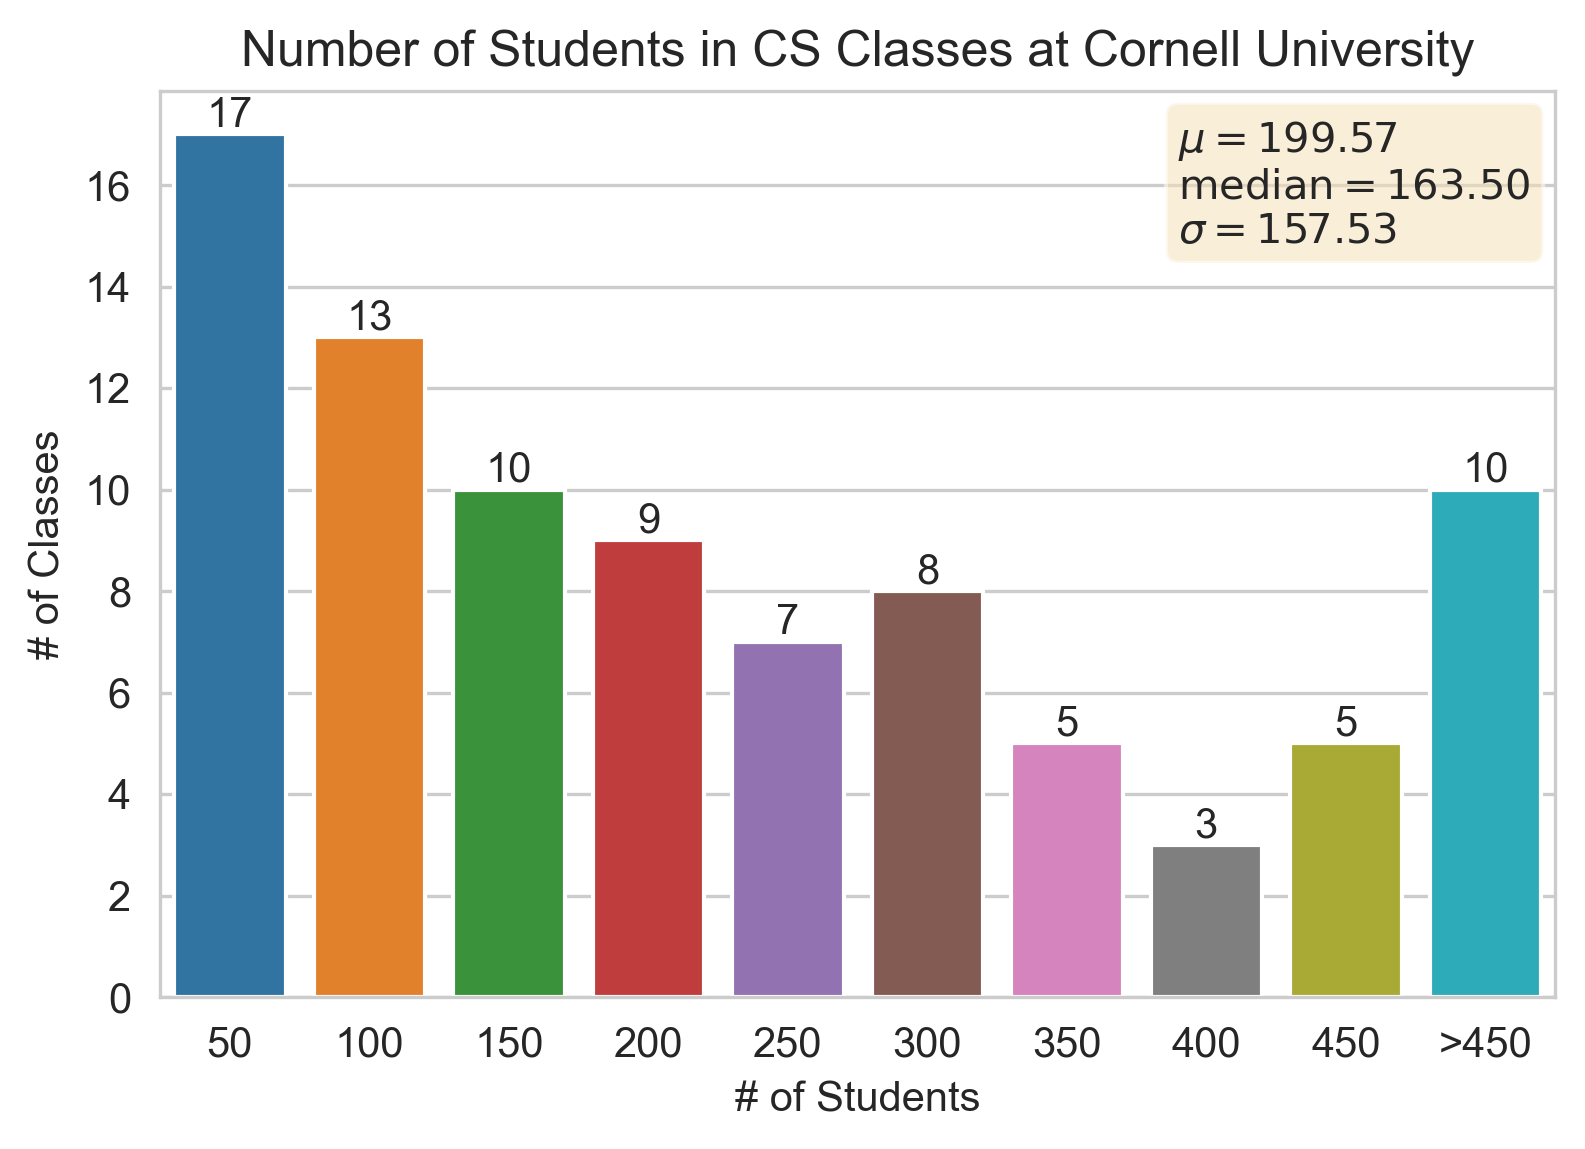

In [115]:
ax = sb.barplot(x=bar_x, y=bar_y)
ax.bar_label(ax.containers[0])

mu = cs_classes['# of Students'].mean()
median = cs_classes['# of Students'].median()
sigma = cs_classes['# of Students'].std()

text_str = '\n'.join((
    r'$\mu=%.2f$' % (mu),
    r'$\mathrm{median}=%.2f$' % (median),
    r'$\sigma=%.2f$' % (sigma)))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.73, 0.97, text_str, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.xlabel('# of Students')
plt.ylabel('# of Classes')
plt.title('Number of Students in CS Classes at Cornell University');

In [130]:
cs_classes['Median Grade'].value_counts()

B+    29
A-    26
A     16
B     13
A+     2
Name: Median Grade, dtype: int64

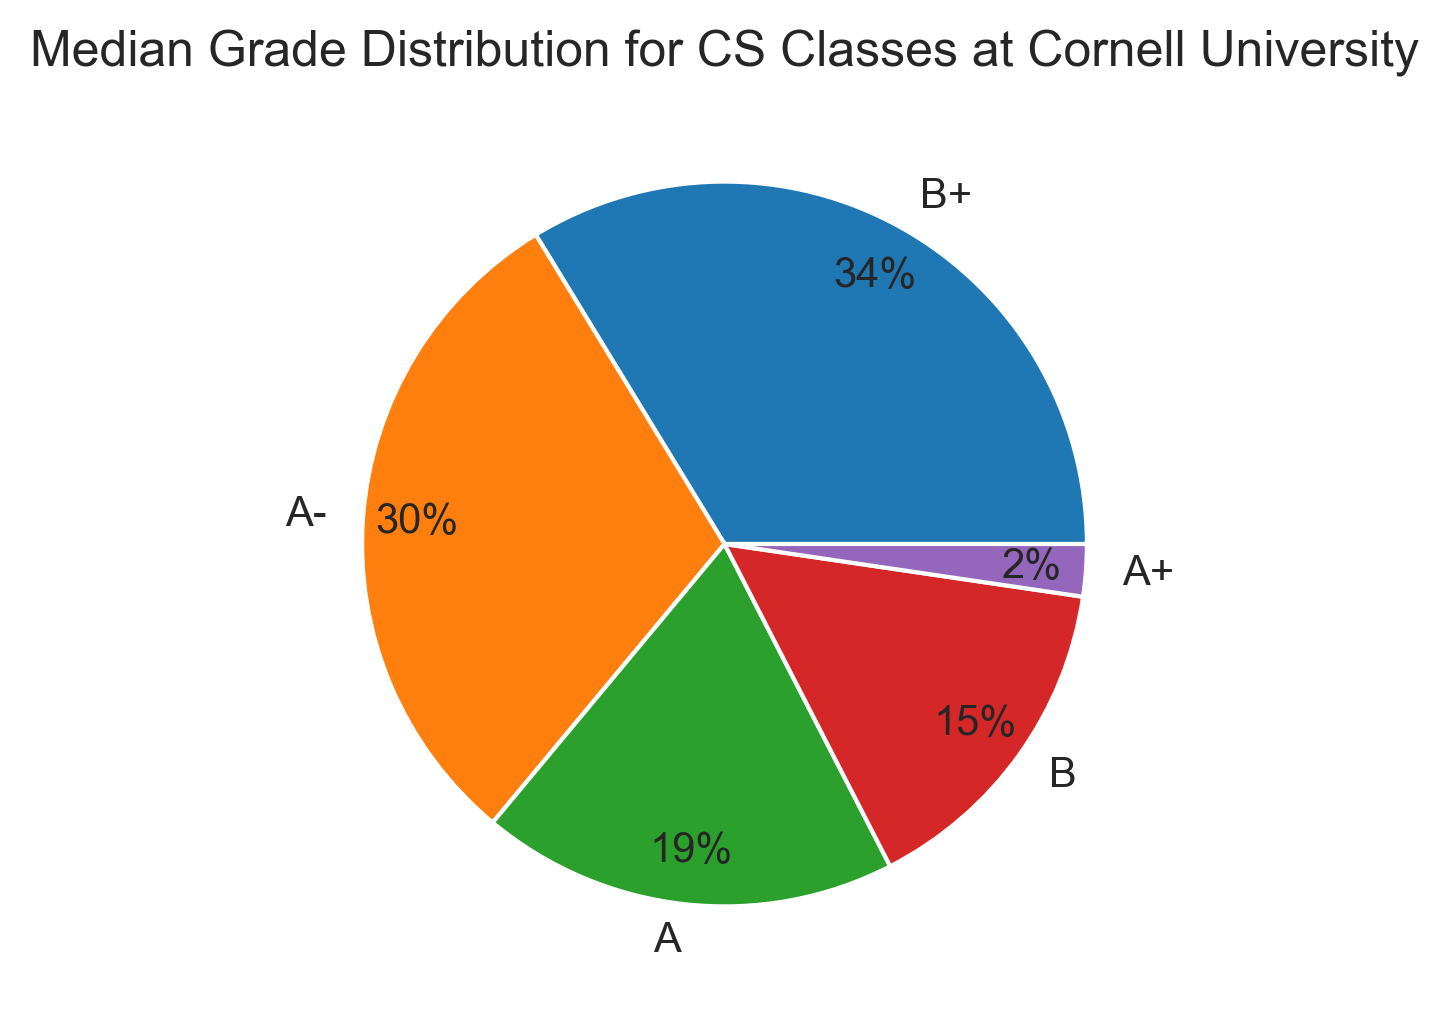

In [149]:
plt.pie(cs_classes['Median Grade'].value_counts(), labels=['B+', 'A-', 'A', 'B', 'A+'], autopct='%1.0f%%', 
        pctdistance=0.85);
plt.title('Median Grade Distribution for CS Classes at Cornell University');

In [190]:
letter_grade_low_percent = []
letter_grade_high_percent = []
gpa = []

for letter_grade in cs_classes['Median Grade']:
  if (letter_grade == 'B'):
    letter_grade_low_percent.append(83)
    letter_grade_high_percent.append(86)
    gpa.append(3.0)
  elif (letter_grade == 'B+'):
    letter_grade_low_percent.append(87)
    letter_grade_high_percent.append(89)
    gpa.append(3.3)
  elif (letter_grade == 'A-'):
    letter_grade_low_percent.append(90)
    letter_grade_high_percent.append(92)
    gpa.append(3.7)
  elif (letter_grade == 'A'):
    letter_grade_low_percent.append(93)
    letter_grade_high_percent.append(96)
    gpa.append(4.0)
  elif (letter_grade == 'A+'):
    letter_grade_low_percent.append(97)
    letter_grade_high_percent.append(100)
    gpa.append(4.3)
  else:
    letter_grade_low_percent.append(np.nan)
    letter_grade_high_percent.append(np.nan)
    gpa.append(np.nan)
    
cs_classes['Max Percent'] = letter_grade_high_percent
cs_classes['Min Percent'] = letter_grade_low_percent
cs_classes['GPA'] = gpa

C:\Users\Mohit\AppData\Local\Temp/ipykernel_15176/1521512990.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_classes['Max Percent'] = letter_grade_high_percent
C:\Users\Mohit\AppData\Local\Temp/ipykernel_15176/1521512990.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_classes['Min Percent'] = letter_grade_low_percent
C:\Users\Mohit\AppData\Local\Temp/ipykernel_15176/1521512990.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [191]:
cs_classes

,Class,Professor,Median Grade,Semester,# of Students,Notes,Max Percent,Min Percent,GPA
0,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...,89.0,87.0,3.3
1,CS 1110,Lee/Bracy,B,FA20,460.0,NaN,86.0,83.0,3.0
2,CS 1110,White,B+,FA22,743.0,NaN,89.0,87.0,3.3
3,CS 1112,Fan,B,SP22,157.0,NaN,86.0,83.0,3.0
4,CS 1112,Fan,B,FA21,NaN,NaN,86.0,83.0,3.0
...,...,...,...,...,...,...,...,...,...
82,CS 4830,Noah,A,SP22,55.0,NaN,96.0,93.0,4.0
83,CS 4830,Stephens-Davidowitz,A,SP21,37.0,NaN,96.0,93.0,4.0
84,CS 4850,Kleinberg,B+,SP22,50.0,NaN,89.0,87.0,3.3
85,CS 4860,Bob Constable,B+,FA20,22.0,NaN,89.0,87.0,3.3


In [192]:
cs_classes.isna().sum()

Class             0
Professor         0
Median Grade      1
Semester          0
# of Students     3
Notes            69
Max Percent       1
Min Percent       1
GPA               1
dtype: int64

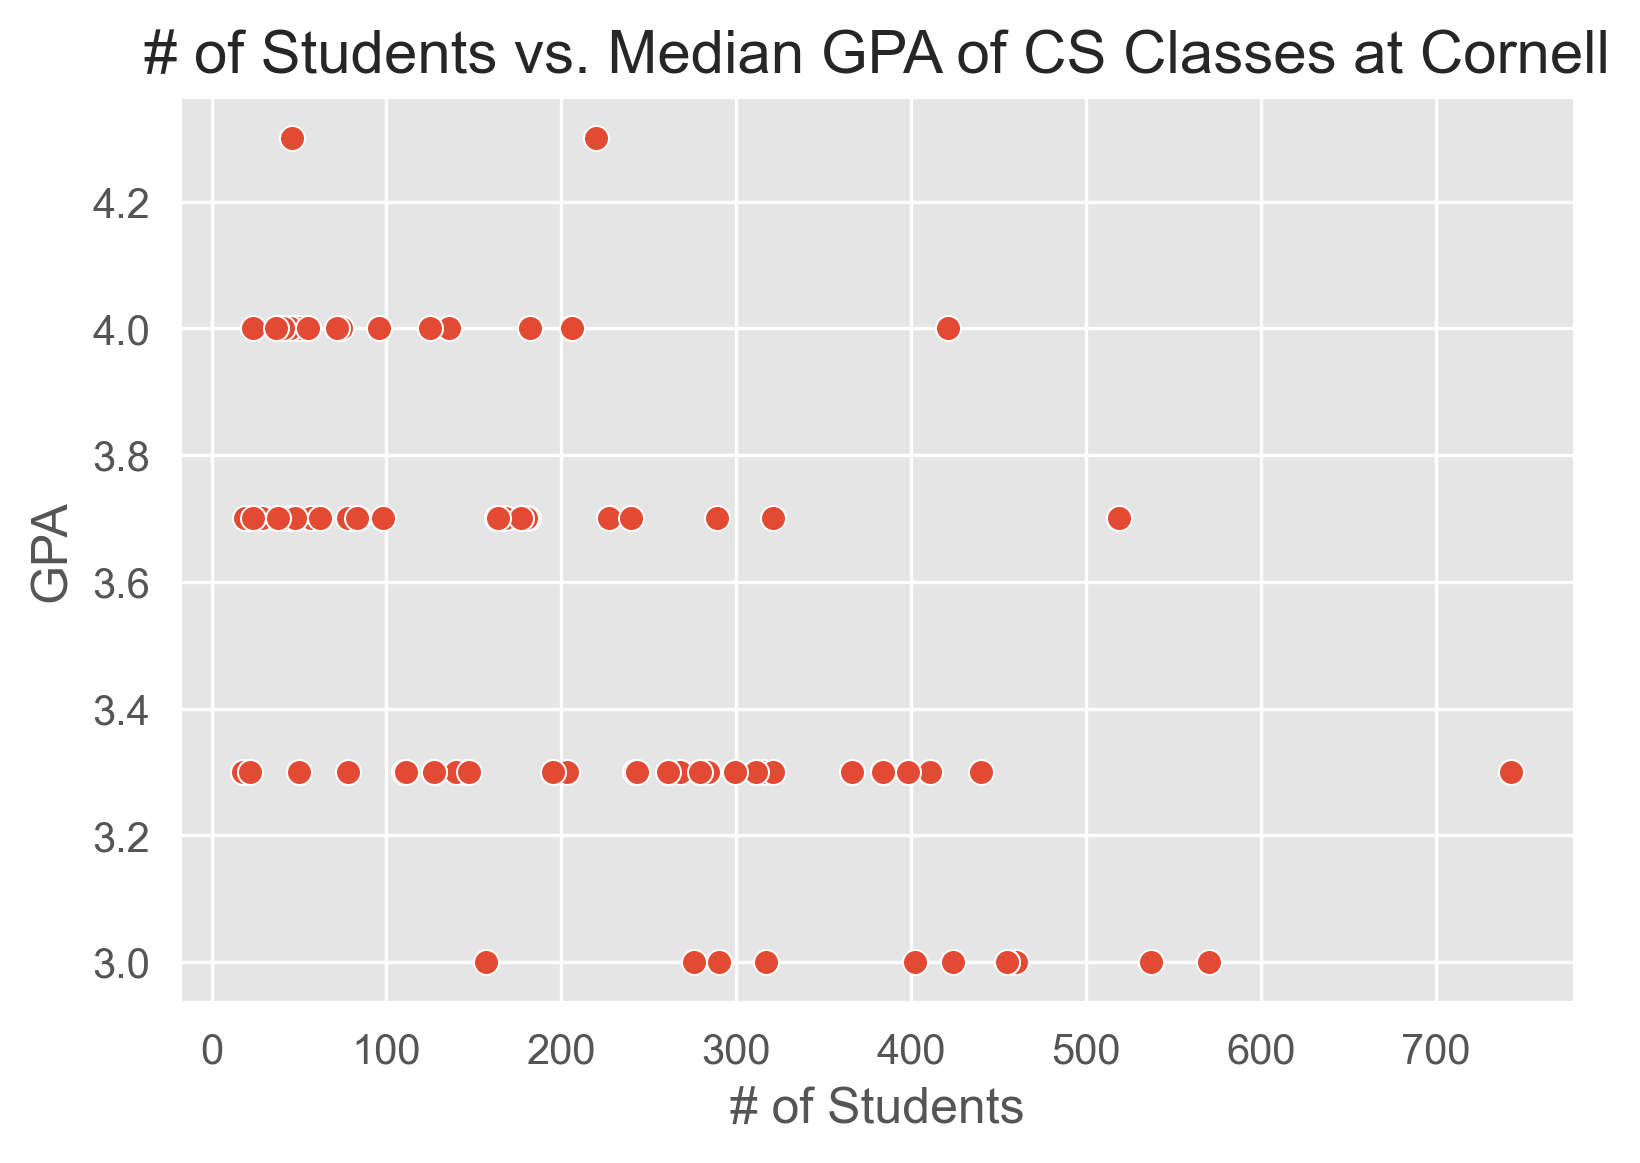

In [208]:
sb.scatterplot(x=cs_classes['# of Students'], y=cs_classes['GPA']);
plt.title('# of Students vs. Median GPA of CS Classes at Cornell');

In [201]:
cs_classes[cs_classes['Median Grade'] == 'A+']['# of Students'].mean()

133.0

In [203]:
aplus = cs_classes[cs_classes['Median Grade'] == 'A+']['# of Students'].mean()
a = cs_classes[cs_classes['Median Grade'] == 'A']['# of Students'].mean()
aminus = cs_classes[cs_classes['Median Grade'] == 'A-']['# of Students'].mean()
bplus = cs_classes[cs_classes['Median Grade'] == 'B+']['# of Students'].mean()
b = cs_classes[cs_classes['Median Grade'] == 'B']['# of Students'].mean()

Text(0.5, 1.0, 'Median Grade vs. Number of Students in CS Classes at Cornell')

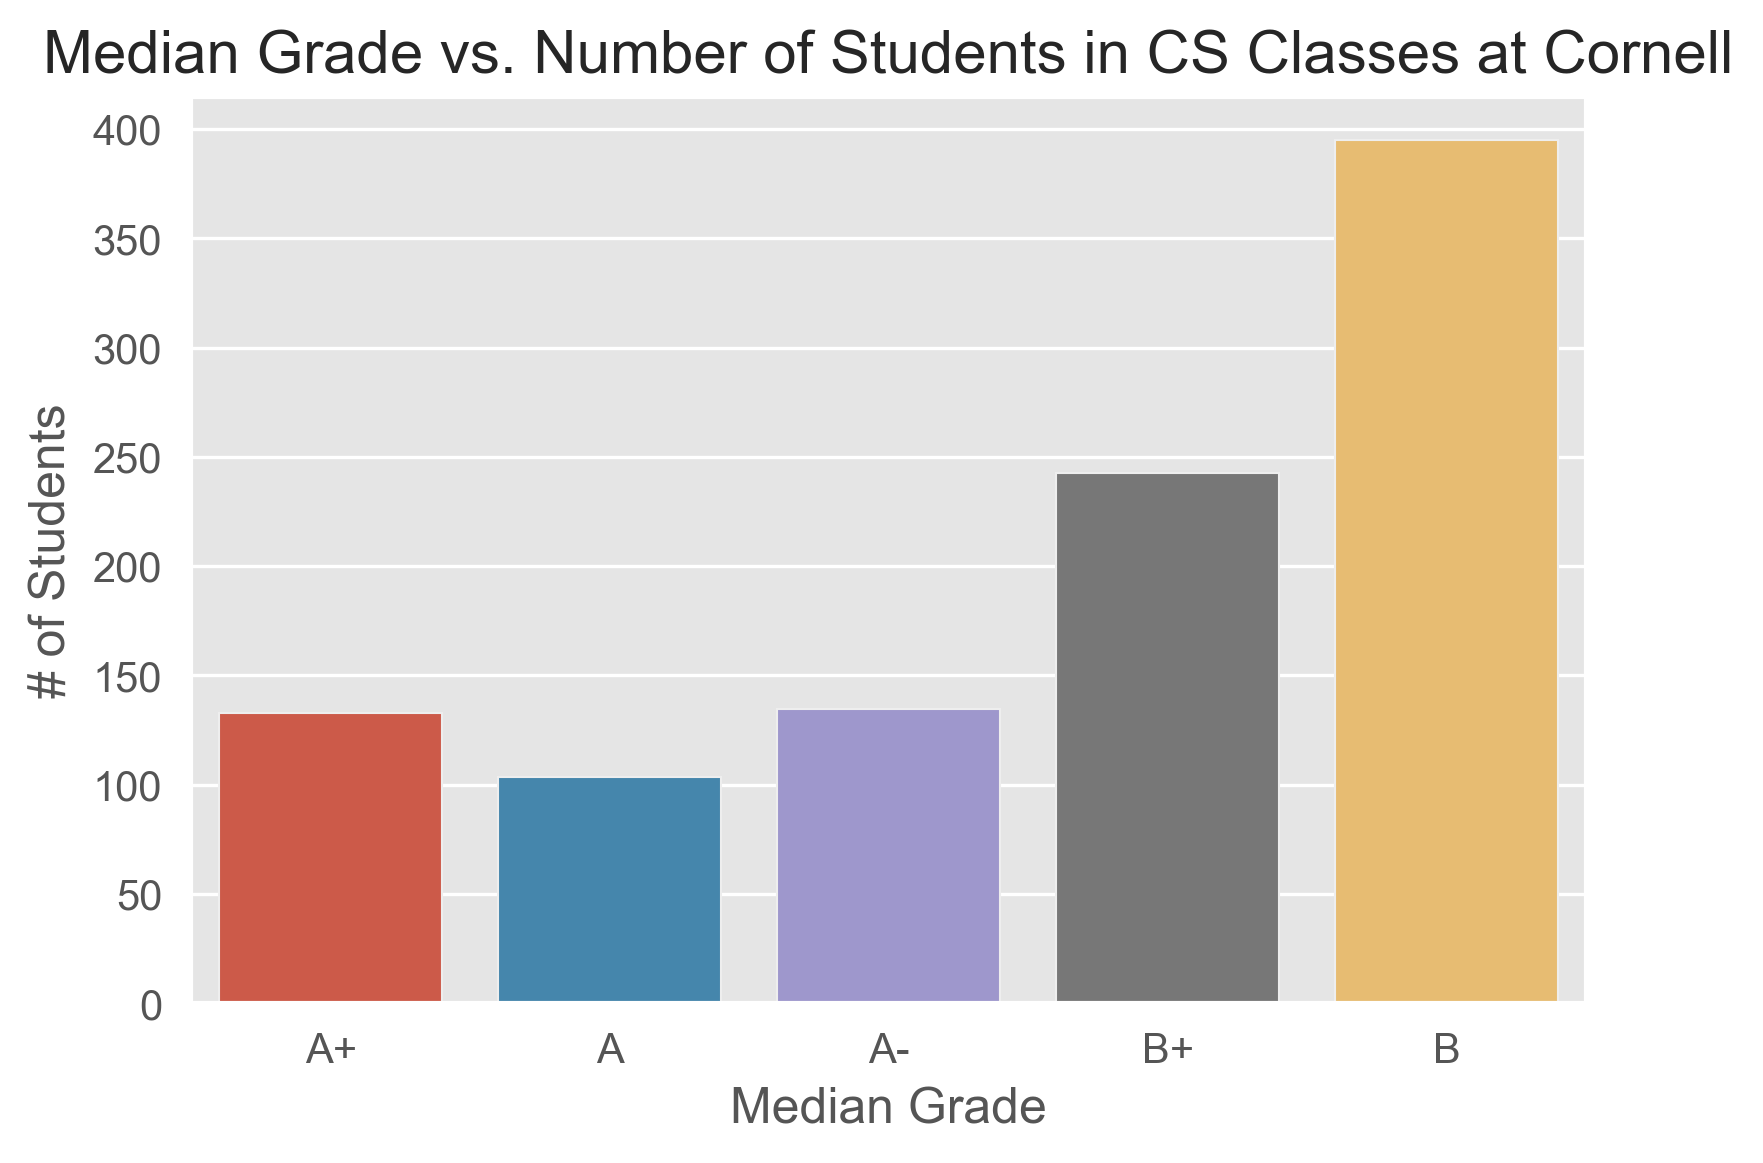

In [207]:
sb.barplot(x=['A+', 'A', 'A-', 'B+', 'B'], y=[aplus, a, aminus, bplus, b]);
plt.xlabel('Median Grade')
plt.ylabel('# of Students')
plt.title('Median Grade vs. Number of Students in CS Classes at Cornell')

In [209]:
cs_classes.head()

,Class,Professor,Median Grade,Semester,# of Students,Notes,Max Percent,Min Percent,GPA
0,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...,89.0,87.0,3.3
1,CS 1110,Lee/Bracy,B,FA20,460.0,NaN,86.0,83.0,3.0
2,CS 1110,White,B+,FA22,743.0,NaN,89.0,87.0,3.3
3,CS 1112,Fan,B,SP22,157.0,NaN,86.0,83.0,3.0
4,CS 1112,Fan,B,FA21,NaN,NaN,86.0,83.0,3.0


In [213]:
cs_classes['Semester'].str.slice(stop=2)

0     SP
1     FA
2     FA
3     SP
4     FA
      ..
82    SP
83    SP
84    SP
85    FA
86    FA
Name: Semester, Length: 87, dtype: object

In [215]:
cs_classes['Term'] = cs_classes['Semester'].str.slice(stop=2)
cs_classes['Year'] = cs_classes['Semester'].str.slice(start=2)
cs_classes.head()

C:\Users\Mohit\AppData\Local\Temp/ipykernel_15176/3711951048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_classes['Term'] = cs_classes['Semester'].str.slice(stop=2)
C:\Users\Mohit\AppData\Local\Temp/ipykernel_15176/3711951048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_classes['Year'] = cs_classes['Semester'].str.slice(start=2)


,Class,Professor,Median Grade,Semester,# of Students,Notes,Max Percent,Min Percent,GPA,Term,Year
0,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...,89.0,87.0,3.3,SP,22
1,CS 1110,Lee/Bracy,B,FA20,460.0,NaN,86.0,83.0,3.0,FA,20
2,CS 1110,White,B+,FA22,743.0,NaN,89.0,87.0,3.3,FA,22
3,CS 1112,Fan,B,SP22,157.0,NaN,86.0,83.0,3.0,SP,22
4,CS 1112,Fan,B,FA21,NaN,NaN,86.0,83.0,3.0,FA,21


In [216]:
cs_classes.isna().sum()

Class             0
Professor         0
Median Grade      1
Semester          0
# of Students     3
Notes            69
Max Percent       1
Min Percent       1
GPA               1
Term              0
Year              0
dtype: int64

In [220]:
cs_classes.head()

,Class,Professor,Median Grade,Semester,# of Students,Notes,Max Percent,Min Percent,GPA,Term,Year
0,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...,89.0,87.0,3.3,SP,22
1,CS 1110,Lee/Bracy,B,FA20,460.0,NaN,86.0,83.0,3.0,FA,20
2,CS 1110,White,B+,FA22,743.0,NaN,89.0,87.0,3.3,FA,22
3,CS 1112,Fan,B,SP22,157.0,NaN,86.0,83.0,3.0,SP,22
4,CS 1112,Fan,B,FA21,NaN,NaN,86.0,83.0,3.0,FA,21


In [230]:
for i in range(len(cs_classes['Term'])):
  if (cs_classes['Term'].loc[i] == 'SP'):
    cs_classes['Term'].loc[i] = 'Spring'
  elif (cs_classes['Term'].loc[i] == 'FA'):
    cs_classes['Term'].loc[i] = 'Fall'

cs_classes.head()

c:\Users\Mohit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Class,Professor,Median Grade,Semester,# of Students,Notes,Max Percent,Min Percent,GPA,Term,Year
0,CS,Sen,B+,SP22,18.0,Sen did say that the expected median was B+ be...,89.0,87.0,3.3,Spring,22
1,CS 1110,Lee/Bracy,B,FA20,460.0,NaN,86.0,83.0,3.0,Fall,20
2,CS 1110,White,B+,FA22,743.0,NaN,89.0,87.0,3.3,Fall,22
3,CS 1112,Fan,B,SP22,157.0,NaN,86.0,83.0,3.0,Spring,22
4,CS 1112,Fan,B,FA21,NaN,NaN,86.0,83.0,3.0,Fall,21


In [231]:
cs_classes['Term'].unique()

array(['Spring', 'Fall'], dtype=object)

In [232]:
cs_classes.isna().sum()

Class             0
Professor         0
Median Grade      1
Semester          0
# of Students     3
Notes            69
Max Percent       1
Min Percent       1
GPA               1
Term              0
Year              0
dtype: int64

In [235]:
cs_classes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Class          87 non-null     object 
 1   Professor      87 non-null     object 
 2   Median Grade   86 non-null     object 
 3   Semester       87 non-null     object 
 4   # of Students  84 non-null     float64
 5   Notes          18 non-null     object 
 6   Max Percent    86 non-null     float64
 7   Min Percent    86 non-null     float64
 8   GPA            86 non-null     float64
 9   Term           87 non-null     object 
 10  Year           87 non-null     object 
dtypes: float64(4), object(7)
memory usage: 10.2+ KB


In [234]:
cs_classes['Year'].unique()

array(['22', '20', '21', '19'], dtype=object)

In [236]:
cs_classes[cs_classes['Year'] == '19']

,Class,Professor,Median Grade,Semester,# of Students,Notes,Max Percent,Min Percent,GPA,Term,Year
9,CS 2110,Gries/Muhlberger,B,FA19,455.0,Crosslisted with ENGRD 2110,86.0,83.0,3.0,Fall,19
21,CS 2850,Halpern,A-,FA19,NaN,NaN,92.0,90.0,3.7,Fall,19
50,CS 4411,RVR + FBS,A,FA19,24.0,NaN,96.0,93.0,4.0,Fall,19
65,CS 4750,Knepper,A-,FA19,83.0,NaN,92.0,90.0,3.7,Fall,19
80,CS 4820,Tardos,B+,FA19,440.0,NaN,89.0,87.0,3.3,Fall,19


In [245]:
cs_classes[(cs_classes['Year'] == '19') & (cs_classes['Term'] == 'Fall')]

,Class,Professor,Median Grade,Semester,# of Students,Notes,Max Percent,Min Percent,GPA,Term,Year
9,CS 2110,Gries/Muhlberger,B,FA19,455.0,Crosslisted with ENGRD 2110,86.0,83.0,3.0,Fall,19
21,CS 2850,Halpern,A-,FA19,NaN,NaN,92.0,90.0,3.7,Fall,19
50,CS 4411,RVR + FBS,A,FA19,24.0,NaN,96.0,93.0,4.0,Fall,19
65,CS 4750,Knepper,A-,FA19,83.0,NaN,92.0,90.0,3.7,Fall,19
80,CS 4820,Tardos,B+,FA19,440.0,NaN,89.0,87.0,3.3,Fall,19


In [250]:
fall_2019 = cs_classes[(cs_classes['Year'] == '19') & (cs_classes['Term'] == 'Fall')]['GPA'].mean()
spring_2019 = cs_classes[(cs_classes['Year'] == '19') & (cs_classes['Term'] == 'Spring')]['GPA'].mean()
fall_2020 = cs_classes[(cs_classes['Year'] == '20') & (cs_classes['Term'] == 'Fall')]['GPA'].mean()
spring_2020 = cs_classes[(cs_classes['Year'] == '20') & (cs_classes['Term'] == 'Spring')]['GPA'].mean()
fall_2021 = cs_classes[(cs_classes['Year'] == '21') & (cs_classes['Term'] == 'Fall')]['GPA'].mean()
spring_2021 = cs_classes[(cs_classes['Year'] == '21') & (cs_classes['Term'] == 'Spring')]['GPA'].mean()
fall_2022 = cs_classes[(cs_classes['Year'] == '22') & (cs_classes['Term'] == 'Fall')]['GPA'].mean()
spring_2022 = cs_classes[(cs_classes['Year'] == '22') & (cs_classes['Term'] == 'Spring')]['GPA'].mean()

In [282]:
total_2019 = (fall_2019 + spring_2019) / 2
total_2020 = (fall_2020 + spring_2020) / 2
total_2021 = (fall_2021 + spring_2021) / 2
total_2022 = (fall_2022 + spring_2022) / 2

In [283]:
sample = pd.DataFrame({'Year': ['2019', '2019', '2019', '2020', '2020', '2020', '2021', '2021', '2021', '2022', '2022', '2022'],
                       'Term': ['Fall', 'Spring', 'Total', 'Fall', 'Spring', 'Total', 'Fall', 'Spring', 'Total', 'Fall', 'Spring', 'Total'],
                       'Mean GPA': [fall_2019, spring_2019, total_2019, fall_2020, spring_2020, total_2020, fall_2021, 
                                    spring_2021, total_2021, fall_2022, spring_2022, total_2022]})
sample

,Year,Term,Mean GPA
0,2019,Fall,3.540000
1,2019,Spring,NaN
2,2019,Total,NaN
3,2020,Fall,3.481818
4,2020,Spring,NaN
5,2020,Total,NaN
6,2021,Fall,3.478261
7,2021,Spring,3.685714
8,2021,Total,3.581988
9,2022,Fall,3.423529


(3.0, 3.8)

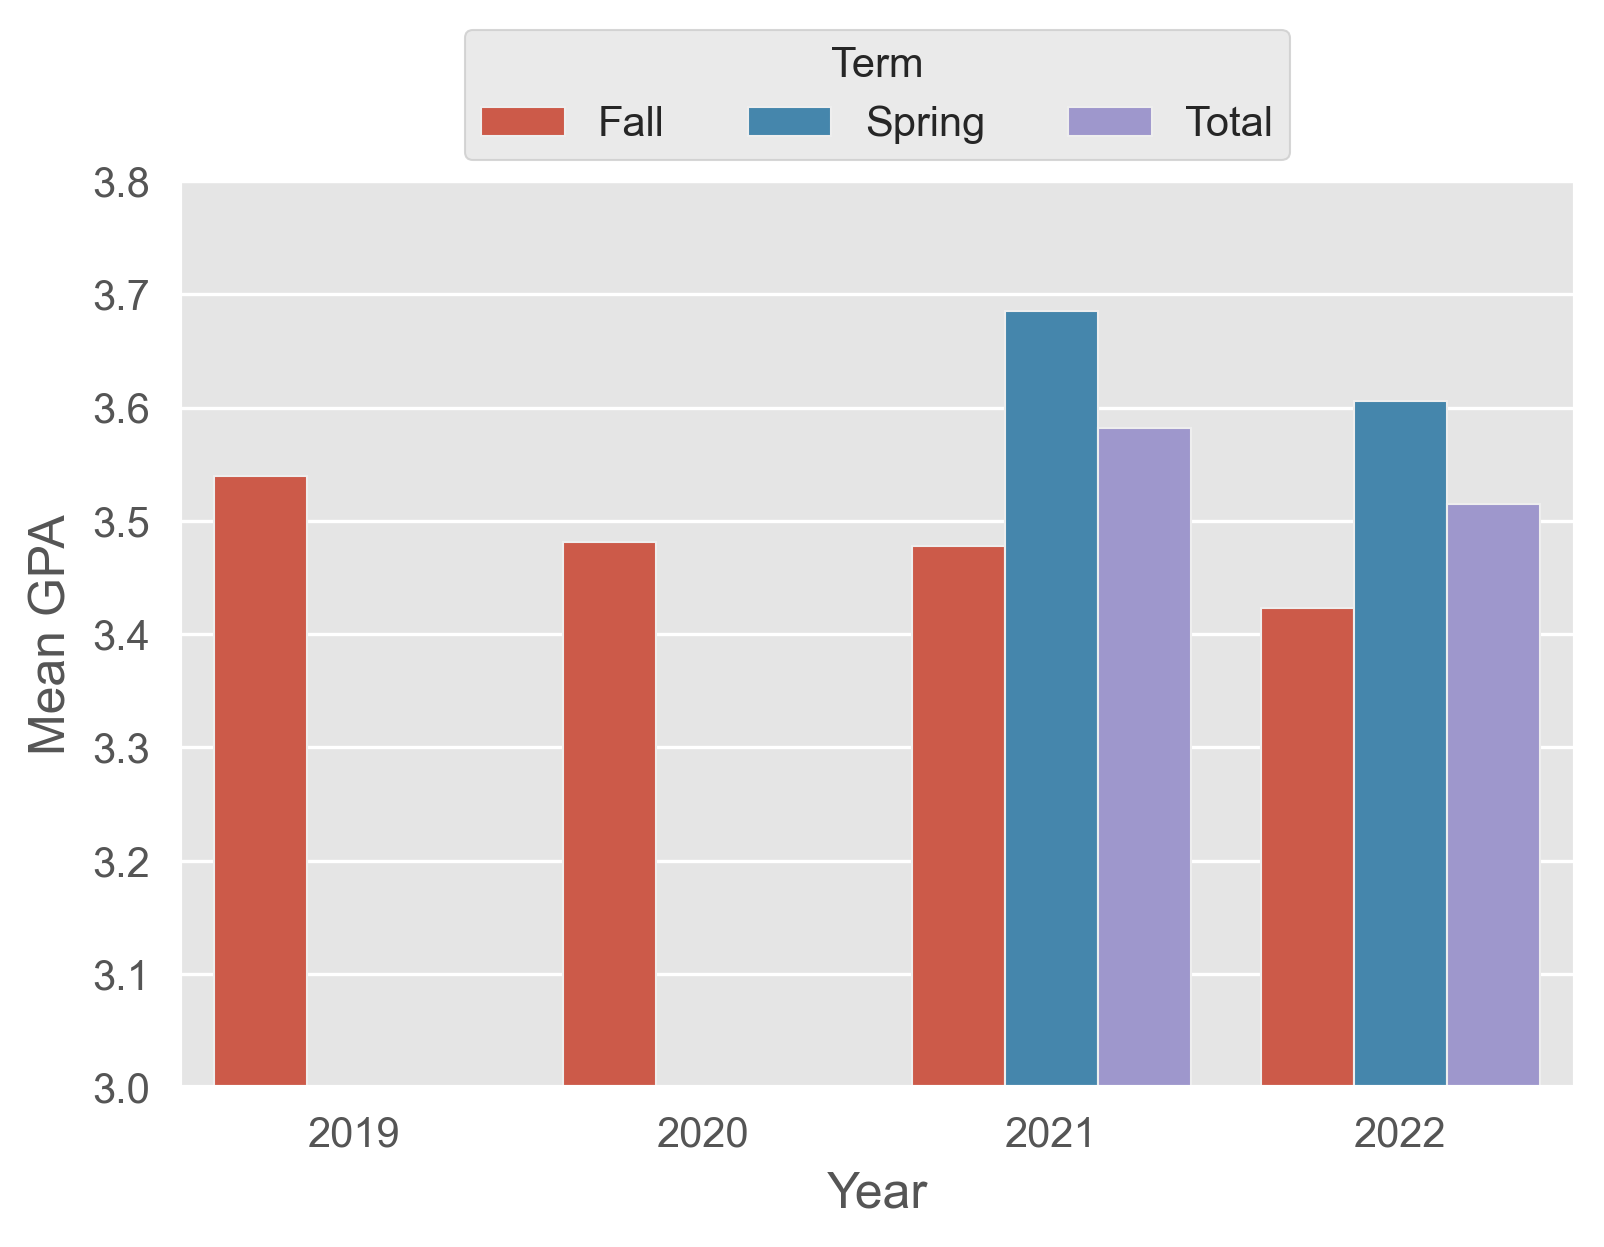

In [284]:
ax = sb.barplot(data=sample, x='Year', y='Mean GPA', hue='Term');
sb.move_legend(ax, 'lower center', ncol=3, bbox_to_anchor=(.5, 1))
ax.set_ylim(3.0, 3.8)